In [ ]:
pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import Flowers102
from torch.utils.data import DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Transformasi gambar
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # convert to tensor and normalize to [0,1]
])

# Load dataset
train_data = Flowers102(root='./data', split='train', transform=transform, download=True)
val_data = Flowers102(root='./data', split='val', transform=transform, download=True)
test_data = Flowers102(root='./data', split='test', transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)


100%|██████████| 345M/345M [00:30<00:00, 11.5MB/s]
100%|██████████| 502/502 [00:00<00:00, 1.97MB/s]
100%|██████████| 15.0k/15.0k [00:00<00:00, 23.5MB/s]


In [ ]:
# Load MobileNetV2 pretrained
model = models.mobilenet_v2(pretrained=True)

# Freeze feature extractor
for param in model.features.parameters():
    param.requires_grad = False

# Replace classifier
model.classifier[1] = nn.Linear(model.last_channel, 102)  # 102 flower classes

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 134MB/s]


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()

    acc = 100 * correct / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}, Accuracy: {acc:.2f}%")


Epoch 1/100, Loss: 140.9516, Accuracy: 11.76%
Epoch 2/100, Loss: 79.4545, Accuracy: 65.10%
Epoch 3/100, Loss: 44.5973, Accuracy: 88.53%
Epoch 4/100, Loss: 27.9007, Accuracy: 94.31%
Epoch 5/100, Loss: 18.9095, Accuracy: 97.45%
Epoch 6/100, Loss: 14.1818, Accuracy: 97.94%
Epoch 7/100, Loss: 10.3451, Accuracy: 99.41%
Epoch 8/100, Loss: 8.0362, Accuracy: 99.71%
Epoch 9/100, Loss: 6.5655, Accuracy: 99.61%
Epoch 10/100, Loss: 5.3675, Accuracy: 99.90%
Epoch 11/100, Loss: 4.4618, Accuracy: 99.90%
Epoch 12/100, Loss: 3.8743, Accuracy: 99.90%
Epoch 13/100, Loss: 3.4098, Accuracy: 100.00%
Epoch 14/100, Loss: 2.8551, Accuracy: 100.00%
Epoch 15/100, Loss: 2.5789, Accuracy: 100.00%
Epoch 16/100, Loss: 2.1874, Accuracy: 100.00%
Epoch 17/100, Loss: 1.9421, Accuracy: 100.00%
Epoch 18/100, Loss: 1.8339, Accuracy: 100.00%
Epoch 19/100, Loss: 1.7441, Accuracy: 100.00%
Epoch 20/100, Loss: 1.6238, Accuracy: 100.00%
Epoch 21/100, Loss: 1.5016, Accuracy: 100.00%
Epoch 22/100, Loss: 1.3505, Accuracy: 100.00%
E

In [ ]:
torch.save(model.state_dict(), 'mobilenetv2_flowers102.pth')


In [ ]:
model = models.mobilenet_v2(pretrained=False)
model.classifier[1] = nn.Linear(model.last_channel, 102)
model.load_state_dict(torch.load('mobilenetv2_flowers102.pth'))
model = model.to(device)
model.eval()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
import os
from PIL import Image
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F

# Transformasi untuk inference
transform_eval = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Fungsi prediksi untuk satu gambar
def predict(image_path, model, topk=5):
    image = Image.open(image_path).convert('RGB')
    image = transform_eval(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image)
        probabilities = F.softmax(output[0], dim=0)
        top_probs, top_classes = probabilities.topk(topk)
        return top_probs.cpu().numpy(), top_classes.cpu().numpy()


In [ ]:
import json
import pandas as pd

# Muat label mapping jika ada
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

# Folder test image
test_folder = './Untitled Folder/'

# Simpan hasil prediksi
results = []

# Loop semua gambar
for filename in os.listdir(test_folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(test_folder, filename)
        probs, classes = predict(image_path, model)

        labels = [class_names.get(str(cls + 1), str(cls + 1)) for cls in classes]  # +1 karena indexing mulai dari 0

        print(f'Gambar: {filename}')
        for i in range(len(probs)):
            print(f'  {i+1}. {labels[i]} ({probs[i]*100:.2f}%)')

        results.append({
            'image': filename,
            'top1_class': labels[0],
            'top1_prob': probs[0],
            'top5_classes': labels,
            'top5_probs': probs.tolist()
        })


Gambar: image_04582.jpg
  1. lenten rose (99.87%)
  2. mallow (0.03%)
  3. bee balm (0.03%)
  4. fritillary (0.01%)
  5. cautleya spicata (0.01%)
Gambar: image_07434.jpg
  1. foxglove (99.95%)
  2. sword lily (0.02%)
  3. snapdragon (0.00%)
  4. sweet william (0.00%)
  5. primula (0.00%)
Gambar: image_04819.jpg
  1. desert-rose (66.06%)
  2. canna lily (13.78%)
  3. ruby-lipped cattleya (6.09%)
  4. cyclamen (5.89%)
  5. carnation (1.95%)
Gambar: image_05769.jpg
  1. king protea (99.88%)
  2. water lily (0.07%)
  3. spear thistle (0.02%)
  4. red ginger (0.01%)
  5. bird of paradise (0.01%)
Gambar: image_03911.jpg
  1. purple coneflower (99.68%)
  2. mexican aster (0.10%)
  3. osteospermum (0.09%)
  4. black-eyed susan (0.07%)
  5. hibiscus (0.01%)
Gambar: image_04870.jpg
  1. hippeastrum (90.40%)
  2. great masterwort (4.53%)
  3. siam tulip (2.27%)
  4. lotus lotus (0.83%)
  5. ball moss (0.45%)
Gambar: image_04428.jpg
  1. canna lily (99.95%)
  2. rose (0.01%)
  3. camellia (0.01%)


In [ ]:
df = pd.DataFrame(results)
df.to_csv('flower_predictions.csv', index=False)
print('Hasil prediksi disimpan ke flower_predictions.csv')


Hasil prediksi disimpan ke flower_predictions.csv


In [ ]:
import os
import torch
import torchvision.transforms as transforms
from torchvision import models
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import json

# ======= Konfigurasi =======
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_folder = './test/'  # ganti sesuai foldermu
model_path = 'mobilenetv2_flowers102.pth'
topk = 5

# ======= Load label map (misalnya dari label_map.json) =======
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

# ======= Load Model =======
model = models.mobilenet_v2(pretrained=False)
model.classifier[1] = torch.nn.Linear(model.last_channel, 102)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

# ======= Transformasi gambar =======
transform_eval = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# ======= Fungsi Prediksi =======
def predict(image_path, model, topk=5):
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform_eval(image).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(image_tensor)
        probabilities = F.softmax(output[0], dim=0)
        top_probs, top_classes = probabilities.topk(topk)
    return top_probs.cpu().numpy(), top_classes.cpu().numpy(), image

# ======= Visualisasi Semua Gambar =======
image_files = [f for f in os.listdir(test_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for filename in image_files:
    image_path = os.path.join(test_folder, filename)
    probs, classes, img = predict(image_path, model, topk=topk)
    labels = [class_names.get(str(cls + 1), f'class_{cls + 1}') for cls in classes]

    # Visualisasi
    fig, (ax1, ax2) = plt.subplots(figsize=(12, 5), ncols=2)

    # Gambar asli
    ax1.imshow(img)
    ax1.axis('off')
    ax1.set_title(f"Gambar: {filename}", fontsize=12)

    # Grafik probabilitas
    ax2.barh(np.arange(topk), probs, color='skyblue')
    ax2.set_xlim(0, 1.1)
    ax2.set_yticks(np.arange(topk))
    ax2.set_yticklabels(labels)
    ax2.invert_yaxis()  # kelas tertinggi di atas
    ax2.set_title("Top-5 Prediksi Kelas", fontsize=12)

    for i, (p, label) in enumerate(zip(probs, labels)):
        ax2.text(p + 0.01, i, f"{p*100:.2f}%", va='center')

    plt.tight_layout()
    plt.show()


In [ ]:
from collections import defaultdict
from tqdm import tqdm

# Inisialisasi struktur untuk menyimpan jumlah benar dan total per kelas
correct_per_class = defaultdict(int)
total_per_class = defaultdict(int)

model.eval()
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Evaluating', leave=False):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)

        for true_label, pred_label in zip(labels, preds):
            true_label = true_label.item()
            pred_label = pred_label.item()
            total_per_class[true_label] += 1
            if true_label == pred_label:
                correct_per_class[true_label] += 1

# Hitung akurasi per kelas
class_accuracy = {}
for label in range(102):
    total = total_per_class[label]
    correct = correct_per_class[label]
    acc = correct / total * 100 if total > 0 else 0
    class_name = class_names.get(str(label + 1), f'class_{label+1}')  # +1 karena label_map dari 1
    class_accuracy[class_name] = acc


In [ ]:
# Urutkan berdasarkan akurasi tertinggi ke terendah
sorted_accuracy = dict(sorted(class_accuracy.items(), key=lambda item: item[1], reverse=True))

# Tampilkan 10 kelas teratas
print("{:<35} {:>10}".format("Kelas", "Akurasi (%)"))
print("-" * 48)
for cls, acc in list(sorted_accuracy.items())[:102]:
    print("{:<35} {:>10.2f}".format(cls, acc))


Kelas                               Akurasi (%)
------------------------------------------------
bird of paradise                        100.00
globe thistle                           100.00
yellow iris                             100.00
giant white arum lily                   100.00
love in the mist                        100.00
alpine sea holly                        100.00
marigold                                100.00
buttercup                               100.00
orange dahlia                           100.00
pink-yellow dahlia                      100.00
cautleya spicata                        100.00
black-eyed susan                        100.00
silverbush                              100.00
osteospermum                            100.00
spring crocus                           100.00
tree poppy                              100.00
blackberry lily                         100.00
frangipani                               99.32
bishop of llandaff                       98.88
wallflower

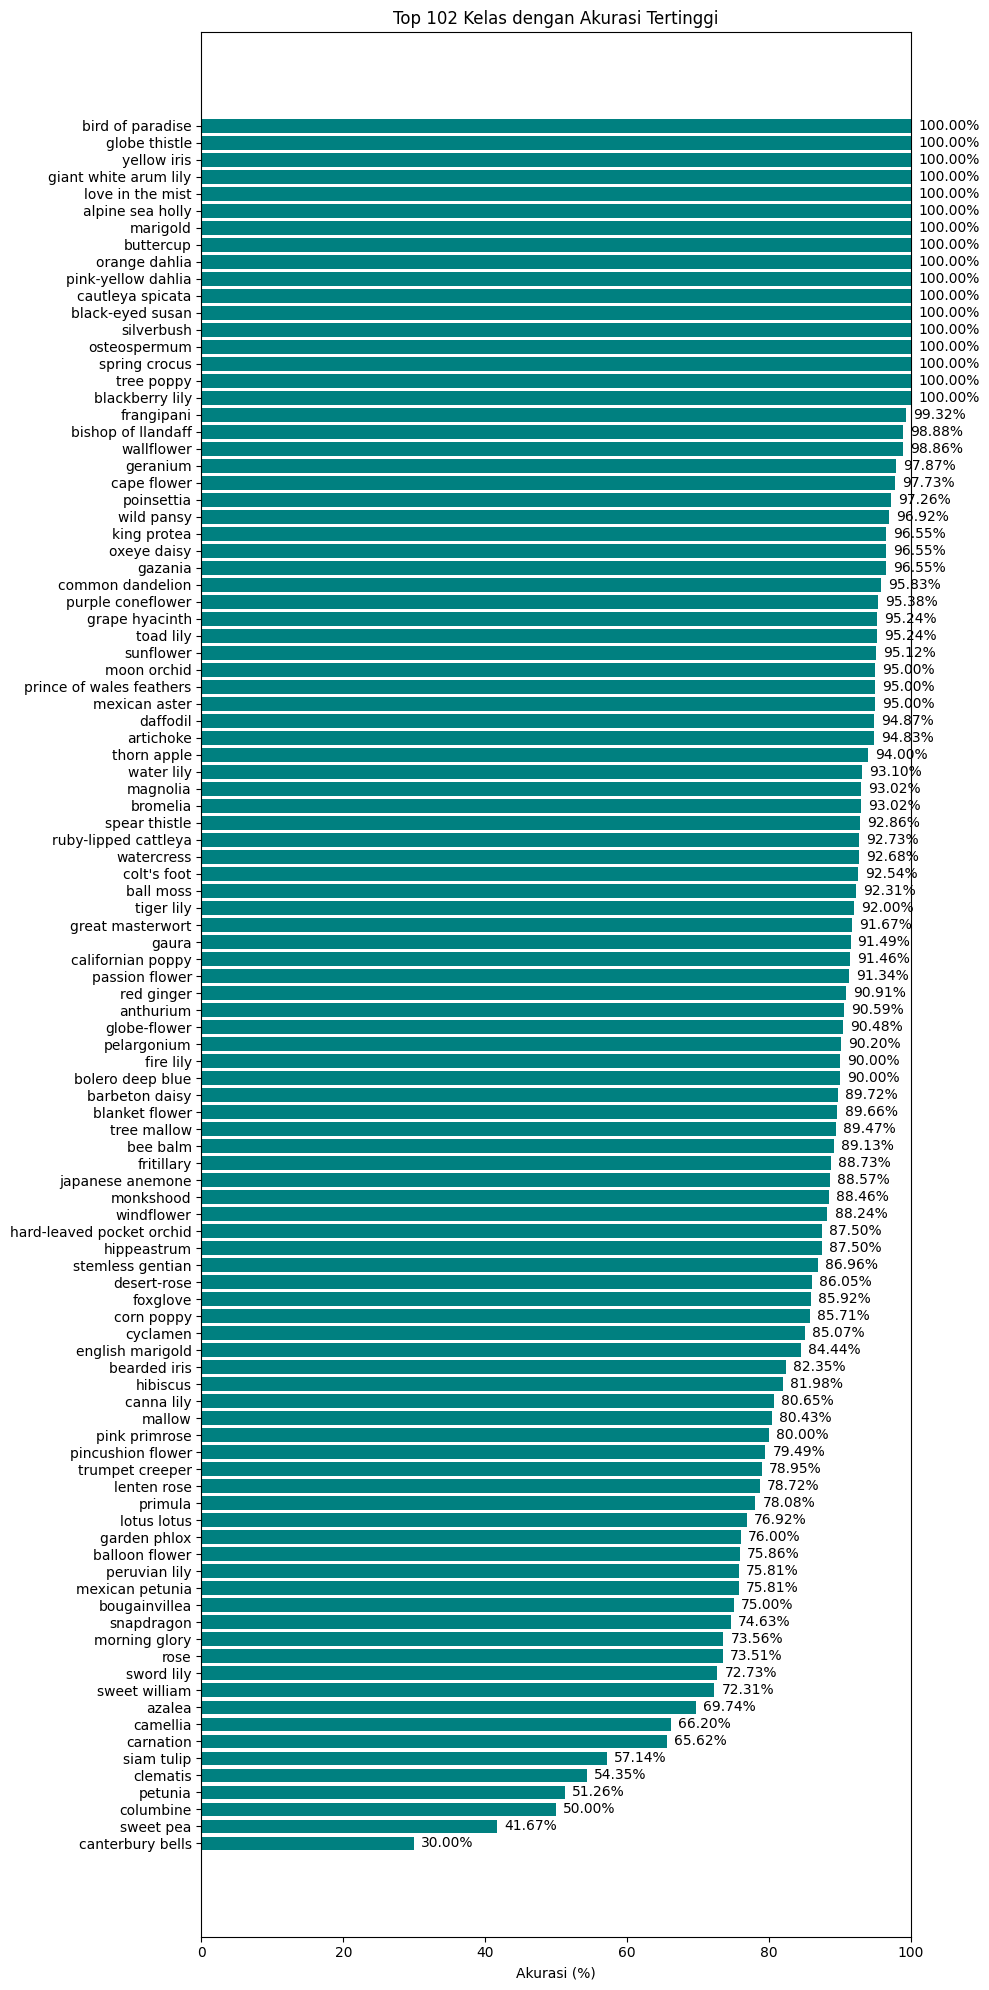

In [ ]:
# Visualisasi top-N kelas
top_n = 102
top_classes = list(sorted_accuracy.keys())[:top_n]
top_accuracies = list(sorted_accuracy.values())[:top_n]

plt.figure(figsize=(10, 20))
plt.barh(top_classes[::-1], top_accuracies[::-1], color='teal')  # balik untuk akurasi tertinggi di atas
plt.xlabel("Akurasi (%)")
plt.title(f"Top {top_n} Kelas dengan Akurasi Tertinggi")
plt.xlim(0, 100)

for i, acc in enumerate(top_accuracies[::-1]):
    plt.text(acc + 1, i, f"{acc:.2f}%", va='center')

plt.tight_layout()
plt.show()


In [ ]:
# Calculate overall accuracy
overall_correct = sum(correct_per_class.values())
overall_total = sum(total_per_class.values())
overall_accuracy = overall_correct / overall_total * 100 if overall_total > 0 else 0

print(f"\nAkurasi Keseluruhan Model: {overall_accuracy:.2f}%")


Akurasi Keseluruhan Model: 85.90%


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Muat model backbone dan tambahkan classifier
model = models.mobilenet_v2(pretrained=False)
model.classifier[1] = nn.Linear(model.last_channel, 102)

# Load bobot model
model.load_state_dict(torch.load("mobilenetv2_flowers102.pth", map_location=device))
model = model.to(device)
model.eval()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
import numpy as np
from tqdm import tqdm

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Collecting predictions'):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(all_labels, all_preds, labels=np.arange(102))


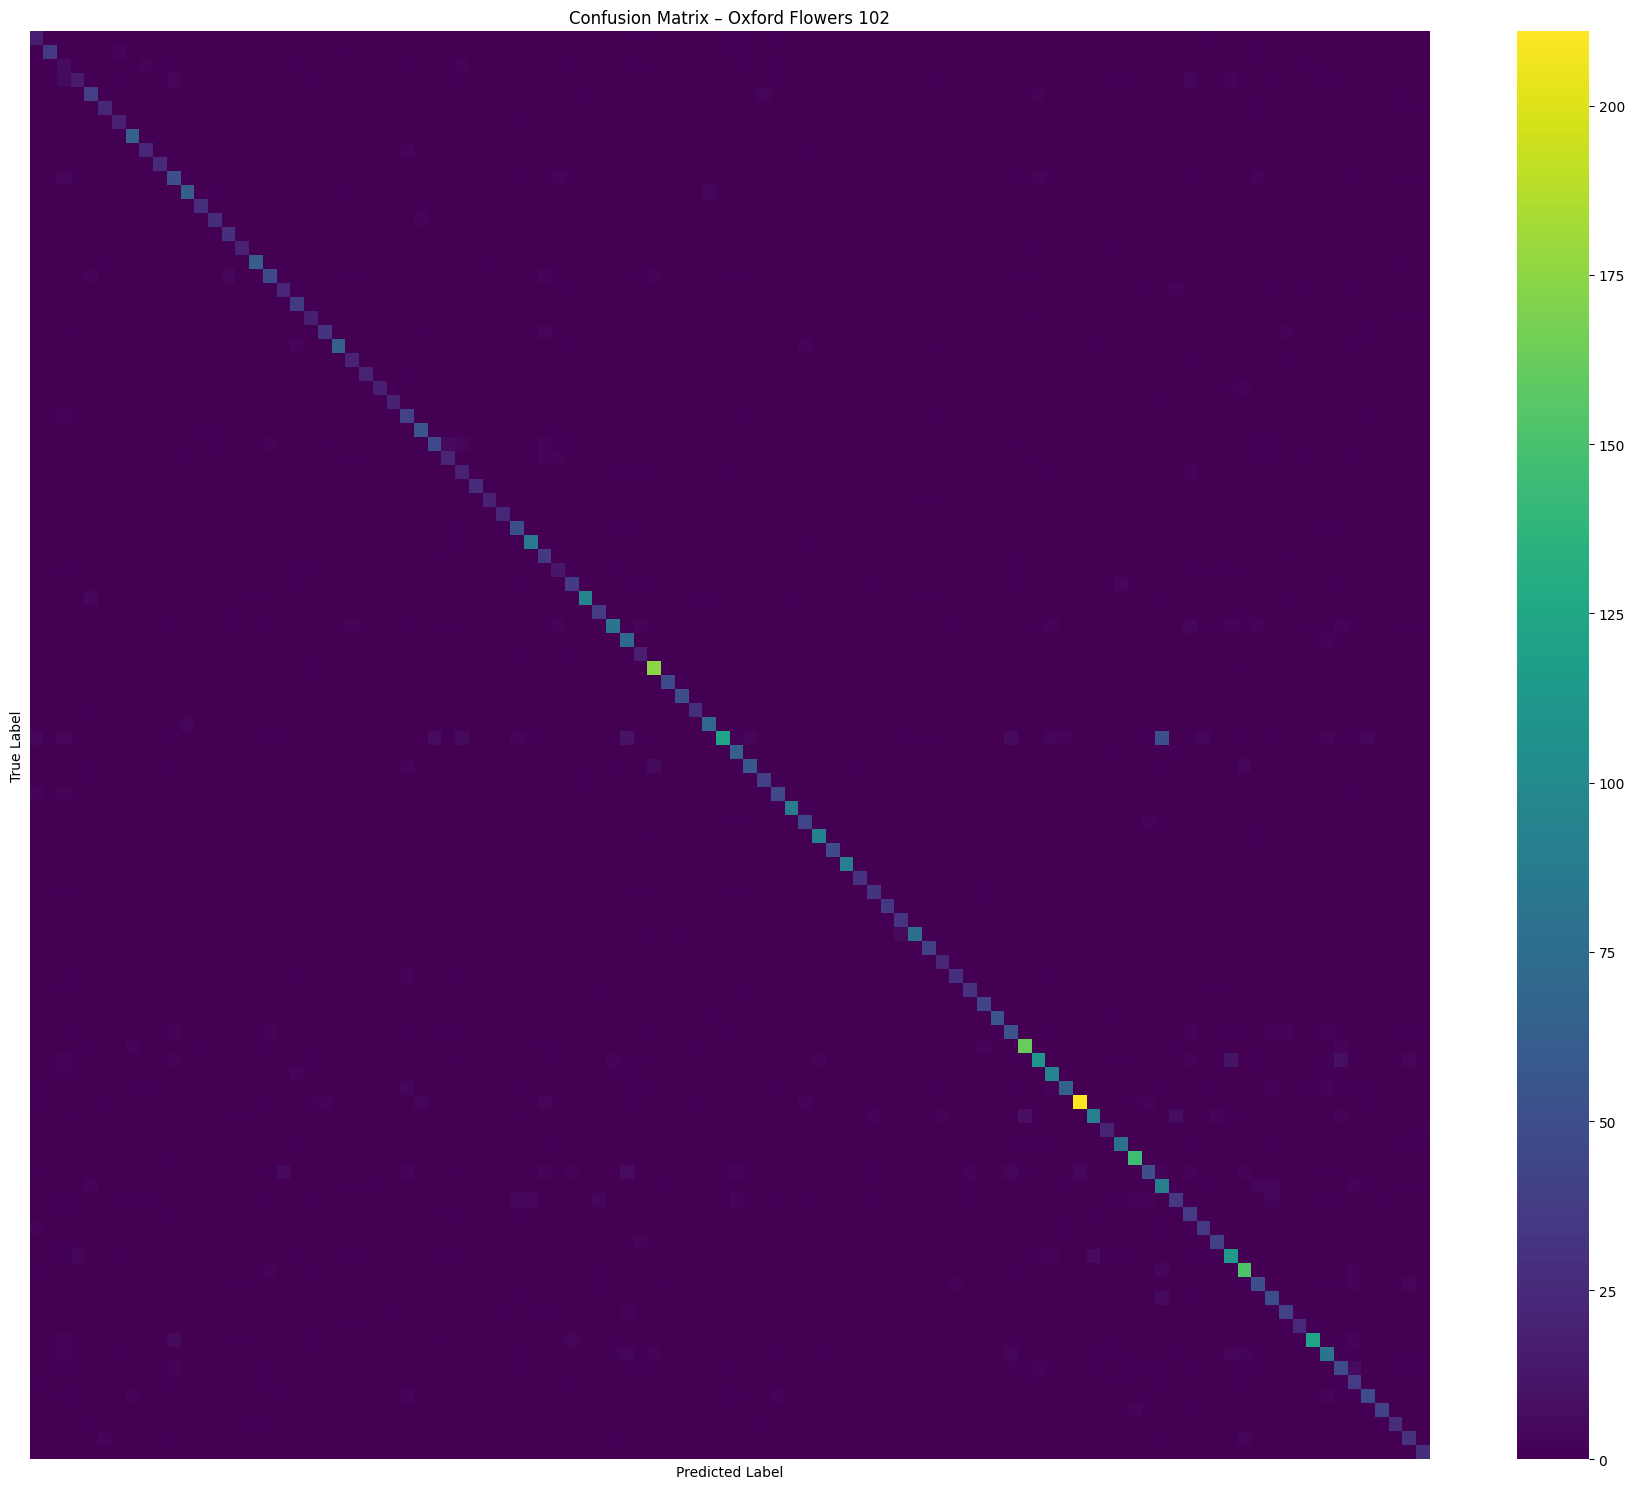

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 15))
sns.heatmap(cm, cmap='viridis', xticklabels=False, yticklabels=False)
plt.title('Confusion Matrix – Oxford Flowers 102')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Buang nilai diagonal (prediksi benar)
cm_no_diag = cm.copy()
np.fill_diagonal(cm_no_diag, 0)

confused_pairs = np.unravel_index(np.argsort(-cm_no_diag, axis=None), cm.shape)

top_confused = []
for i in range(20):
    actual = confused_pairs[0][i]
    predicted = confused_pairs[1][i]
    if cm[actual, predicted] > 0:
        actual_name = class_names.get(str(actual + 1), f'class_{actual+1}')
        predicted_name = class_names.get(str(predicted + 1), f'class_{predicted+1}')
        count = cm[actual, predicted]
        top_confused.append((actual_name, predicted_name, count))

# Cetak 20 kelas yang paling sering tertukar
print("\n🔁 Top-20 Pasangan Kelas yang Sering Tertukar:\n")
for i, (actual, pred, count) in enumerate(top_confused):
    print(f"{i+1:2d}. {actual} ⟶ {pred}  ({count}x salah)")



🔁 Top-20 Pasangan Kelas yang Sering Tertukar:

 1. petunia ⟶ hibiscus  (51x salah)
 2. petunia ⟶ poinsettia  (10x salah)
 3. rose ⟶ cyclamen  (10x salah)
 4. rose ⟶ camellia  (8x salah)
 5. lotus lotus ⟶ water lily  (8x salah)
 6. lotus lotus ⟶ columbine  (7x salah)
 7. petunia ⟶ sweet william  (6x salah)
 8. camellia ⟶ mallow  (6x salah)
 9. clematis ⟶ poinsettia  (6x salah)
10. cyclamen ⟶ lotus lotus  (6x salah)
11. hippeastrum ⟶ hibiscus  (5x salah)
12. californian poppy ⟶ silverbush  (5x salah)
13. petunia ⟶ azalea  (5x salah)
14. petunia ⟶ garden phlox  (5x salah)
15. sweet pea ⟶ canterbury bells  (5x salah)
16. sweet william ⟶ carnation  (5x salah)
17. foxglove ⟶ snapdragon  (5x salah)
18. clematis ⟶ balloon flower  (5x salah)
19. primula ⟶ wallflower  (5x salah)
20. petunia ⟶ pink primrose  (4x salah)


In [ ]:
cm_df = pd.DataFrame(cm)
cm_df.to_csv("confusion_matrix_flowers102.csv", index=False)
print("✅ Confusion matrix disimpan ke 'confusion_matrix_flowers102.csv'")


✅ Confusion matrix disimpan ke 'confusion_matrix_flowers102.csv'


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Memulai Training dengan Augmentasi...


Epoch 1/20 | Train Loss: 4.6477, Train Acc: 3.92% | Val Loss: 3.7363, Val Acc: 23.92%


Epoch 2/20 | Train Loss: 3.1887, Train Acc: 38.14% | Val Loss: 2.8330, Val Acc: 49.90%


Epoch 3/20 | Train Loss: 2.3666, Train Acc: 62.55% | Val Loss: 2.2303, Val Acc: 62.45%


Epoch 4/20 | Train Loss: 1.7689, Train Acc: 74.02% | Val Loss: 1.8865, Val Acc: 67.16%


Epoch 5/20 | Train Loss: 1.3874, Train Acc: 80.20% | Val Loss: 1.6544, Val Acc: 68.53%


Epoch 6/20 | Train Loss: 1.1480, Train Acc: 83.63% | Val Loss: 1.4720, Val Acc: 72.06%


Epoch 7/20 | Train Loss: 0.9488, Train Acc: 87.16% | Val Loss: 1.3615, Val Acc: 72.55%


Epoch 8/20 | Train Loss: 0.8437, Train Acc: 86.86% | Val Loss: 1.2334, Val Acc: 75.49%


Epoch 9/20 | Train Loss: 0.7245, Train Acc: 89.61% | Val Loss: 1.1550, Val Acc: 76.57%


Epoch 10/20 | Train Loss: 0.6824, Train Acc: 89.41% | Val Loss: 1.1546, Val Acc: 76.37%


Epoch 11/20 | Train Loss: 0.6212, Train Acc: 91.37% | Val Loss: 1.0979, Val Acc: 75.78%


Epoch 12/20 | Train Loss: 0.5387, Train Acc: 92.35% | Val Loss: 1.0718, Val Acc: 76.57%


Epoch 13/20 | Train Loss: 0.5042, Train Acc: 92.65% | Val Loss: 1.0299, Val Acc: 76.67%


Epoch 14/20 | Train Loss: 0.4767, Train Acc: 92.84% | Val Loss: 0.9575, Val Acc: 78.24%


Epoch 15/20 | Train Loss: 0.4408, Train Acc: 92.06% | Val Loss: 0.9455, Val Acc: 78.63%


Epoch 16/20 | Train Loss: 0.3942, Train Acc: 94.90% | Val Loss: 0.9525, Val Acc: 78.04%


Epoch 17/20 | Train Loss: 0.3731, Train Acc: 95.39% | Val Loss: 0.9242, Val Acc: 78.92%


Epoch 18/20 | Train Loss: 0.3351, Train Acc: 95.49% | Val Loss: 0.9039, Val Acc: 79.12%


Epoch 19/20 | Train Loss: 0.3173, Train Acc: 95.59% | Val Loss: 0.9088, Val Acc: 77.75%


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 20/20 | Train Loss: 0.2981, Train Acc: 96.08% | Val Loss: 0.9139, Val Acc: 77.75%

Training dengan augmentasi selesai. Model disimpan sebagai 'mobilenetv2_flowers102_augmented.pth'

Evaluasi Model dengan Augmentasi pada Test Set...


Evaluating Augmented Model: 100%|██████████| 193/193 [00:31<00:00,  6.06it/s]


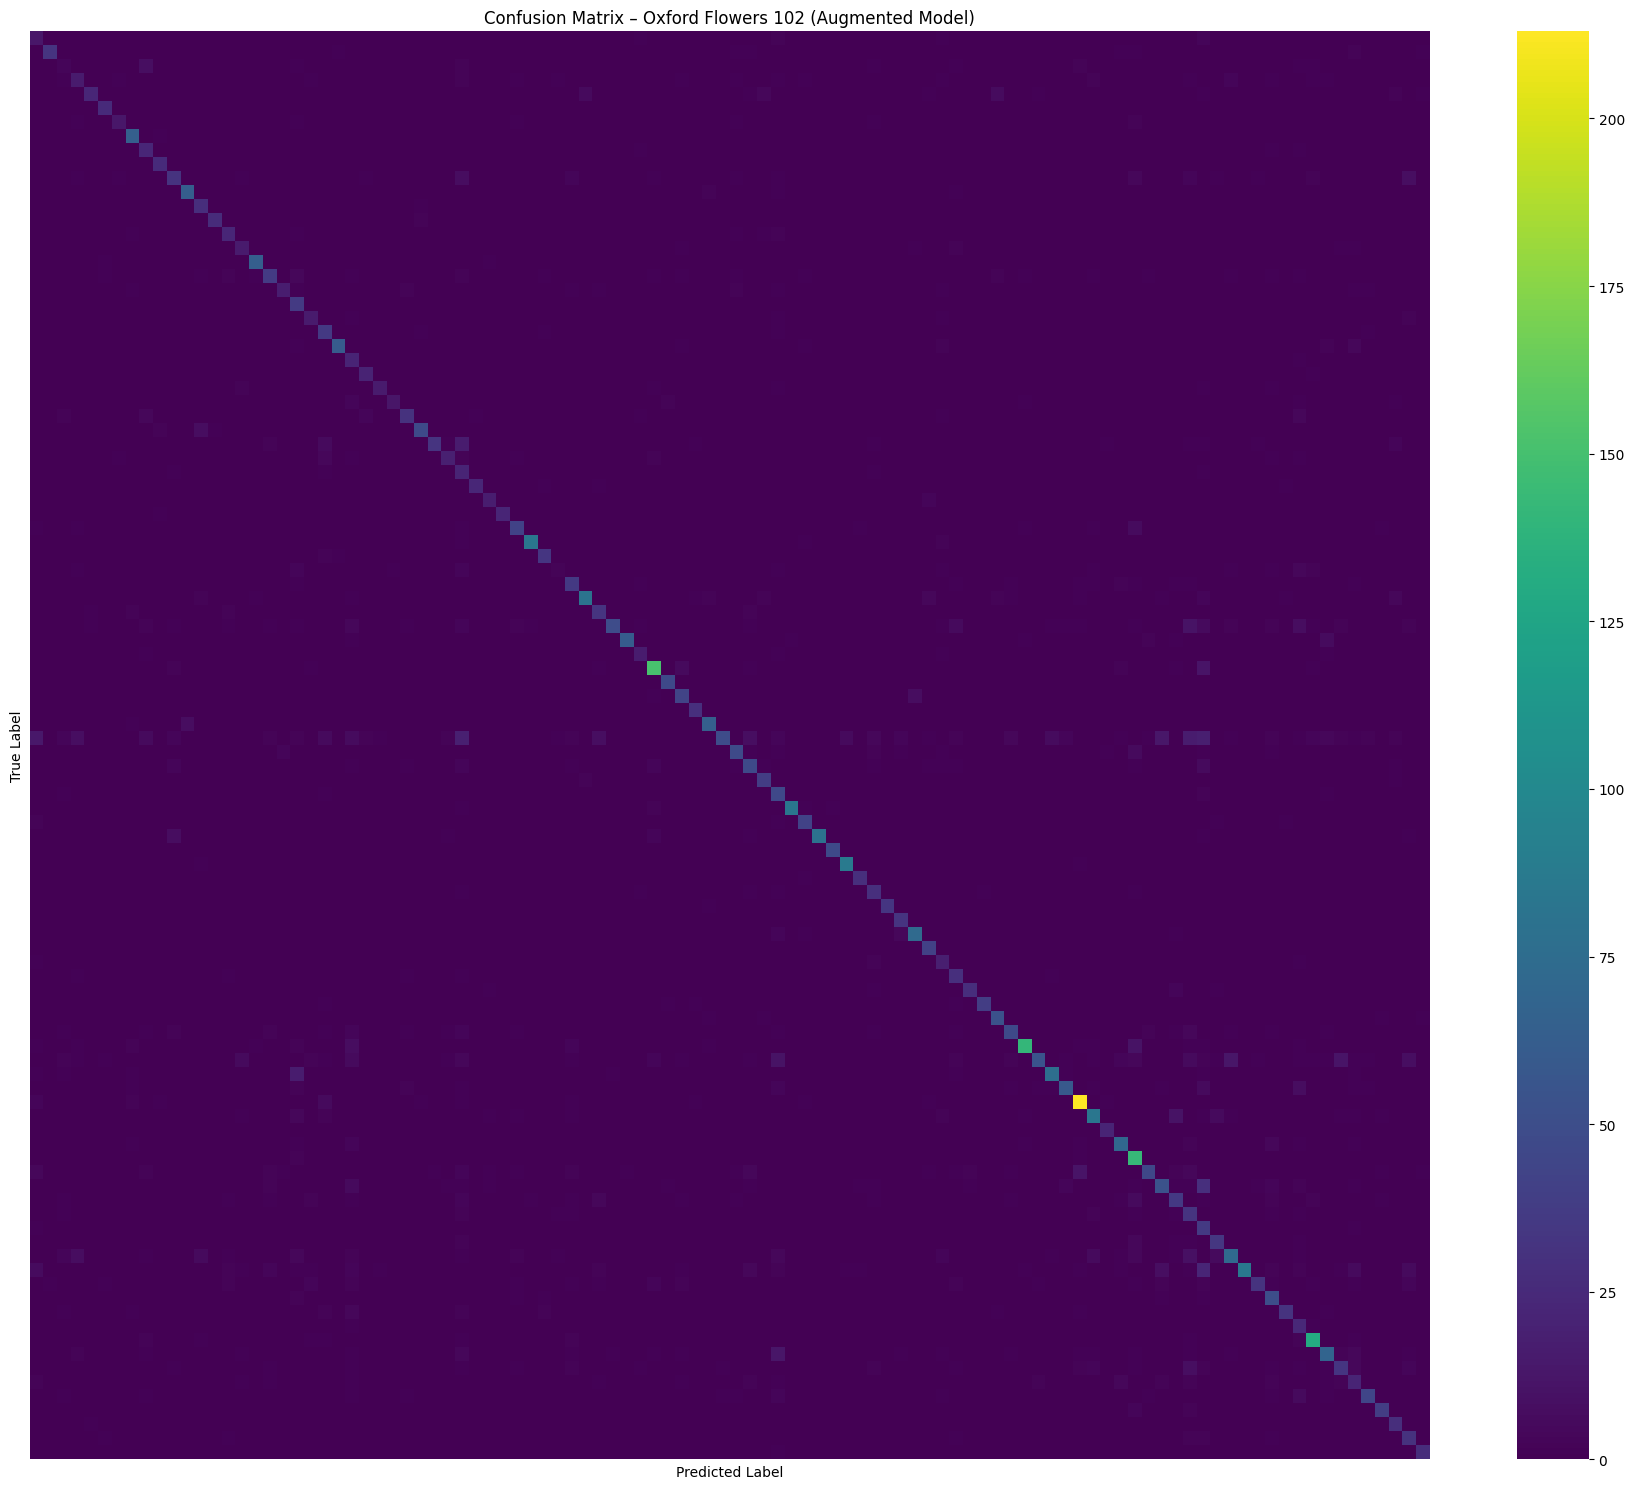


📊 Akurasi Per Kelas (Model Augmented):
Kelas                               Akurasi (%)
------------------------------------------------
tiger lily                              100.00
globe thistle                           100.00
giant white arum lily                   100.00
marigold                                100.00
oxeye daisy                             100.00
orange dahlia                           100.00
silverbush                              100.00
osteospermum                            100.00
toad lily                               100.00
bird of paradise                         98.46
frangipani                               97.95
pink-yellow dahlia                       97.75
black-eyed susan                         97.06
purple coneflower                        96.92
cautleya spicata                         96.67
king protea                              96.55
blanket flower                           96.55
blackberry lily                          96.43
alpine sea holly 

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Memulai Training dengan Weighted Sampler...


Epoch 1/20 | Weighted Train Loss: 4.4685, Weighted Train Acc: 8.92% | Val Loss: 3.8066, Val Acc: 24.12%


Epoch 2/20 | Weighted Train Loss: 3.1224, Weighted Train Acc: 39.22% | Val Loss: 2.9903, Val Acc: 37.16%


Epoch 3/20 | Weighted Train Loss: 2.3118, Weighted Train Acc: 59.61% | Val Loss: 2.3805, Val Acc: 54.02%


Epoch 4/20 | Weighted Train Loss: 1.7898, Weighted Train Acc: 70.10% | Val Loss: 1.9311, Val Acc: 63.63%


Epoch 5/20 | Weighted Train Loss: 1.4110, Weighted Train Acc: 77.75% | Val Loss: 1.7831, Val Acc: 64.51%


Epoch 6/20 | Weighted Train Loss: 1.1162, Weighted Train Acc: 82.16% | Val Loss: 1.5353, Val Acc: 69.41%


Epoch 7/20 | Weighted Train Loss: 1.0141, Weighted Train Acc: 82.94% | Val Loss: 1.3945, Val Acc: 71.27%


Epoch 8/20 | Weighted Train Loss: 0.8314, Weighted Train Acc: 87.65% | Val Loss: 1.3578, Val Acc: 69.22%


Epoch 9/20 | Weighted Train Loss: 0.8061, Weighted Train Acc: 86.57% | Val Loss: 1.2878, Val Acc: 71.47%


Epoch 10/20 | Weighted Train Loss: 0.6667, Weighted Train Acc: 89.61% | Val Loss: 1.1929, Val Acc: 74.22%


Epoch 11/20 | Weighted Train Loss: 0.5993, Weighted Train Acc: 91.18% | Val Loss: 1.1392, Val Acc: 75.49%


Epoch 12/20 | Weighted Train Loss: 0.5201, Weighted Train Acc: 92.75% | Val Loss: 1.0844, Val Acc: 74.80%


Epoch 13/20 | Weighted Train Loss: 0.4761, Weighted Train Acc: 94.31% | Val Loss: 1.0637, Val Acc: 75.78%


Epoch 14/20 | Weighted Train Loss: 0.4498, Weighted Train Acc: 93.63% | Val Loss: 1.0240, Val Acc: 76.08%


Epoch 15/20 | Weighted Train Loss: 0.4197, Weighted Train Acc: 94.51% | Val Loss: 1.0343, Val Acc: 76.57%


Epoch 16/20 | Weighted Train Loss: 0.3989, Weighted Train Acc: 94.12% | Val Loss: 0.9904, Val Acc: 77.65%


Epoch 17/20 | Weighted Train Loss: 0.3882, Weighted Train Acc: 94.51% | Val Loss: 0.9541, Val Acc: 77.84%


Epoch 18/20 | Weighted Train Loss: 0.3777, Weighted Train Acc: 94.31% | Val Loss: 0.9375, Val Acc: 78.92%


Epoch 19/20 | Weighted Train Loss: 0.3483, Weighted Train Acc: 94.90% | Val Loss: 0.9702, Val Acc: 76.76%


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 20/20 | Weighted Train Loss: 0.3186, Weighted Train Acc: 95.59% | Val Loss: 0.9381, Val Acc: 77.55%

Training dengan Weighted Sampler selesai. Model disimpan sebagai 'mobilenetv2_flowers102_weighted.pth'

Evaluasi Model dengan Weighted Sampler pada Test Set...


Evaluating Weighted Model: 100%|██████████| 193/193 [00:31<00:00,  6.07it/s]


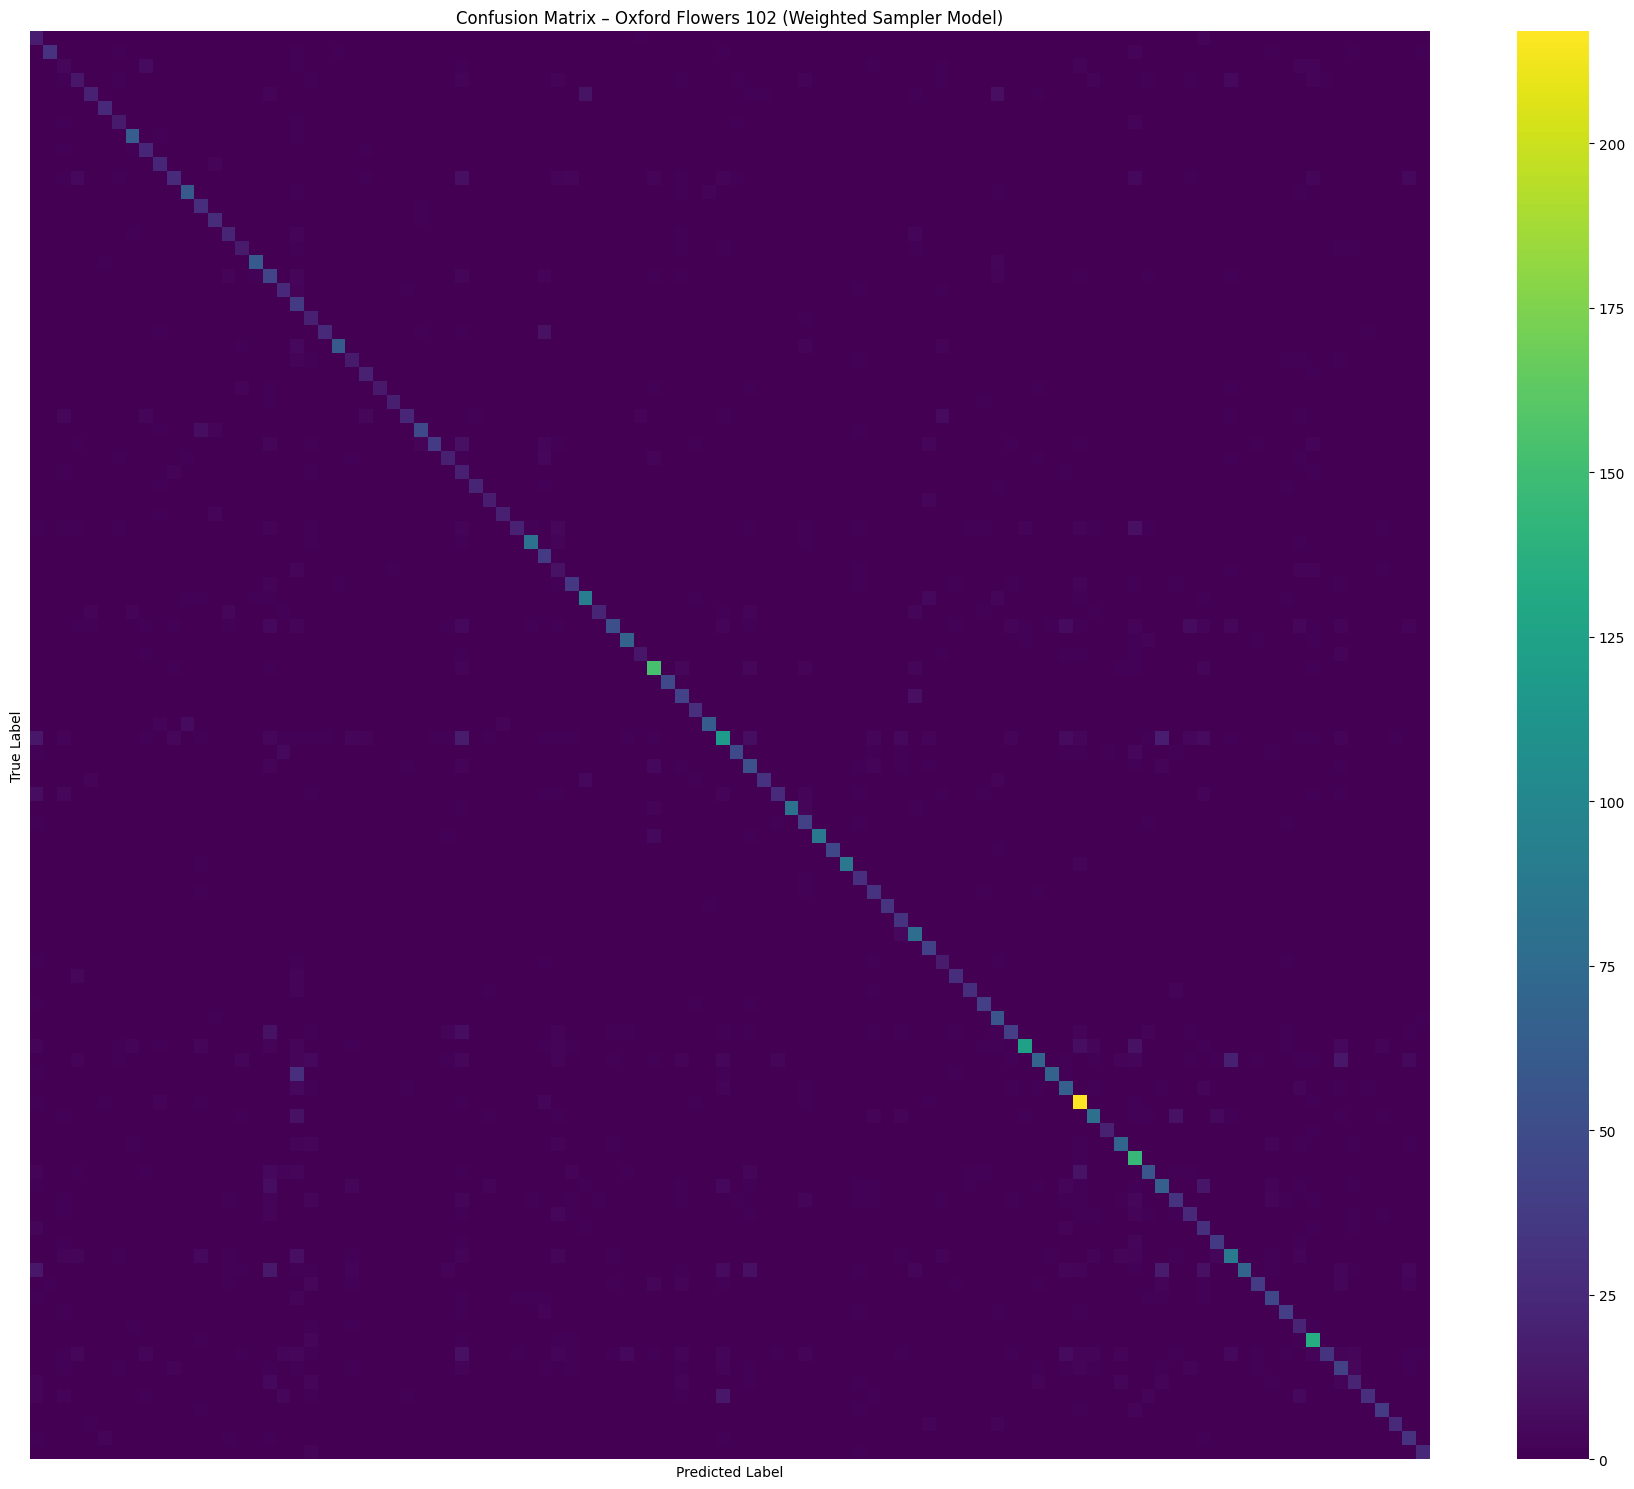

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



📊 Akurasi Per Kelas (Model Weighted Sampler):
Kelas                               Akurasi (%)
------------------------------------------------
tiger lily                              100.00
giant white arum lily                   100.00
great masterwort                        100.00
marigold                                100.00
oxeye daisy                             100.00
silverbush                              100.00
osteospermum                            100.00
frangipani                               99.32
orange dahlia                            97.87
black-eyed susan                         97.06
bird of paradise                         96.92
cautleya spicata                         96.67
pink-yellow dahlia                       96.63
king protea                              96.55
gazania                                  96.55
spear thistle                            96.43
grape hyacinth                           95.24
toad lily                                95.24
fire lily 

Epoch 1/20 | Focal Train Loss: 1.1225, Train Acc: 5.39% | Val Loss (CE): 3.7601, Val Acc: 21.37%


Epoch 2/20 | Focal Train Loss: 0.7221, Train Acc: 42.35% | Val Loss (CE): 2.8655, Val Acc: 49.41%


Epoch 3/20 | Focal Train Loss: 0.4746, Train Acc: 62.65% | Val Loss (CE): 2.3118, Val Acc: 57.16%


Epoch 4/20 | Focal Train Loss: 0.3281, Train Acc: 72.16% | Val Loss (CE): 1.9195, Val Acc: 66.57%


Epoch 5/20 | Focal Train Loss: 0.2407, Train Acc: 78.63% | Val Loss (CE): 1.7017, Val Acc: 67.94%


Epoch 6/20 | Focal Train Loss: 0.1750, Train Acc: 85.00% | Val Loss (CE): 1.5548, Val Acc: 72.06%


Epoch 7/20 | Focal Train Loss: 0.1486, Train Acc: 85.69% | Val Loss (CE): 1.4170, Val Acc: 73.82%


Epoch 8/20 | Focal Train Loss: 0.1209, Train Acc: 90.10% | Val Loss (CE): 1.3628, Val Acc: 73.14%


Epoch 9/20 | Focal Train Loss: 0.1069, Train Acc: 89.71% | Val Loss (CE): 1.3160, Val Acc: 74.61%


Epoch 10/20 | Focal Train Loss: 0.0903, Train Acc: 91.47% | Val Loss (CE): 1.2352, Val Acc: 74.51%


Epoch 11/20 | Focal Train Loss: 0.0767, Train Acc: 92.45% | Val Loss (CE): 1.2121, Val Acc: 76.47%


Epoch 12/20 | Focal Train Loss: 0.0679, Train Acc: 93.63% | Val Loss (CE): 1.1889, Val Acc: 75.20%


Epoch 13/20 | Focal Train Loss: 0.0604, Train Acc: 94.22% | Val Loss (CE): 1.1170, Val Acc: 76.08%


Epoch 14/20 | Focal Train Loss: 0.0585, Train Acc: 93.73% | Val Loss (CE): 1.0899, Val Acc: 77.65%


Epoch 15/20 | Focal Train Loss: 0.0538, Train Acc: 93.53% | Val Loss (CE): 1.0842, Val Acc: 76.37%


Epoch 16/20 | Focal Train Loss: 0.0496, Train Acc: 94.61% | Val Loss (CE): 1.0780, Val Acc: 75.59%


Epoch 17/20 | Focal Train Loss: 0.0431, Train Acc: 94.51% | Val Loss (CE): 1.0261, Val Acc: 78.14%


Epoch 18/20 | Focal Train Loss: 0.0455, Train Acc: 95.20% | Val Loss (CE): 1.0842, Val Acc: 76.27%


Epoch 19/20 | Focal Train Loss: 0.0394, Train Acc: 95.98% | Val Loss (CE): 1.0206, Val Acc: 77.25%


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 20/20 | Focal Train Loss: 0.0353, Train Acc: 95.98% | Val Loss (CE): 0.9716, Val Acc: 79.22%

Training dengan Focal Loss selesai. Model disimpan sebagai 'mobilenetv2_flowers102_focal.pth'

Evaluasi Model dengan Focal Loss pada Test Set...


Evaluating Focal Model: 100%|██████████| 193/193 [00:32<00:00,  6.02it/s]


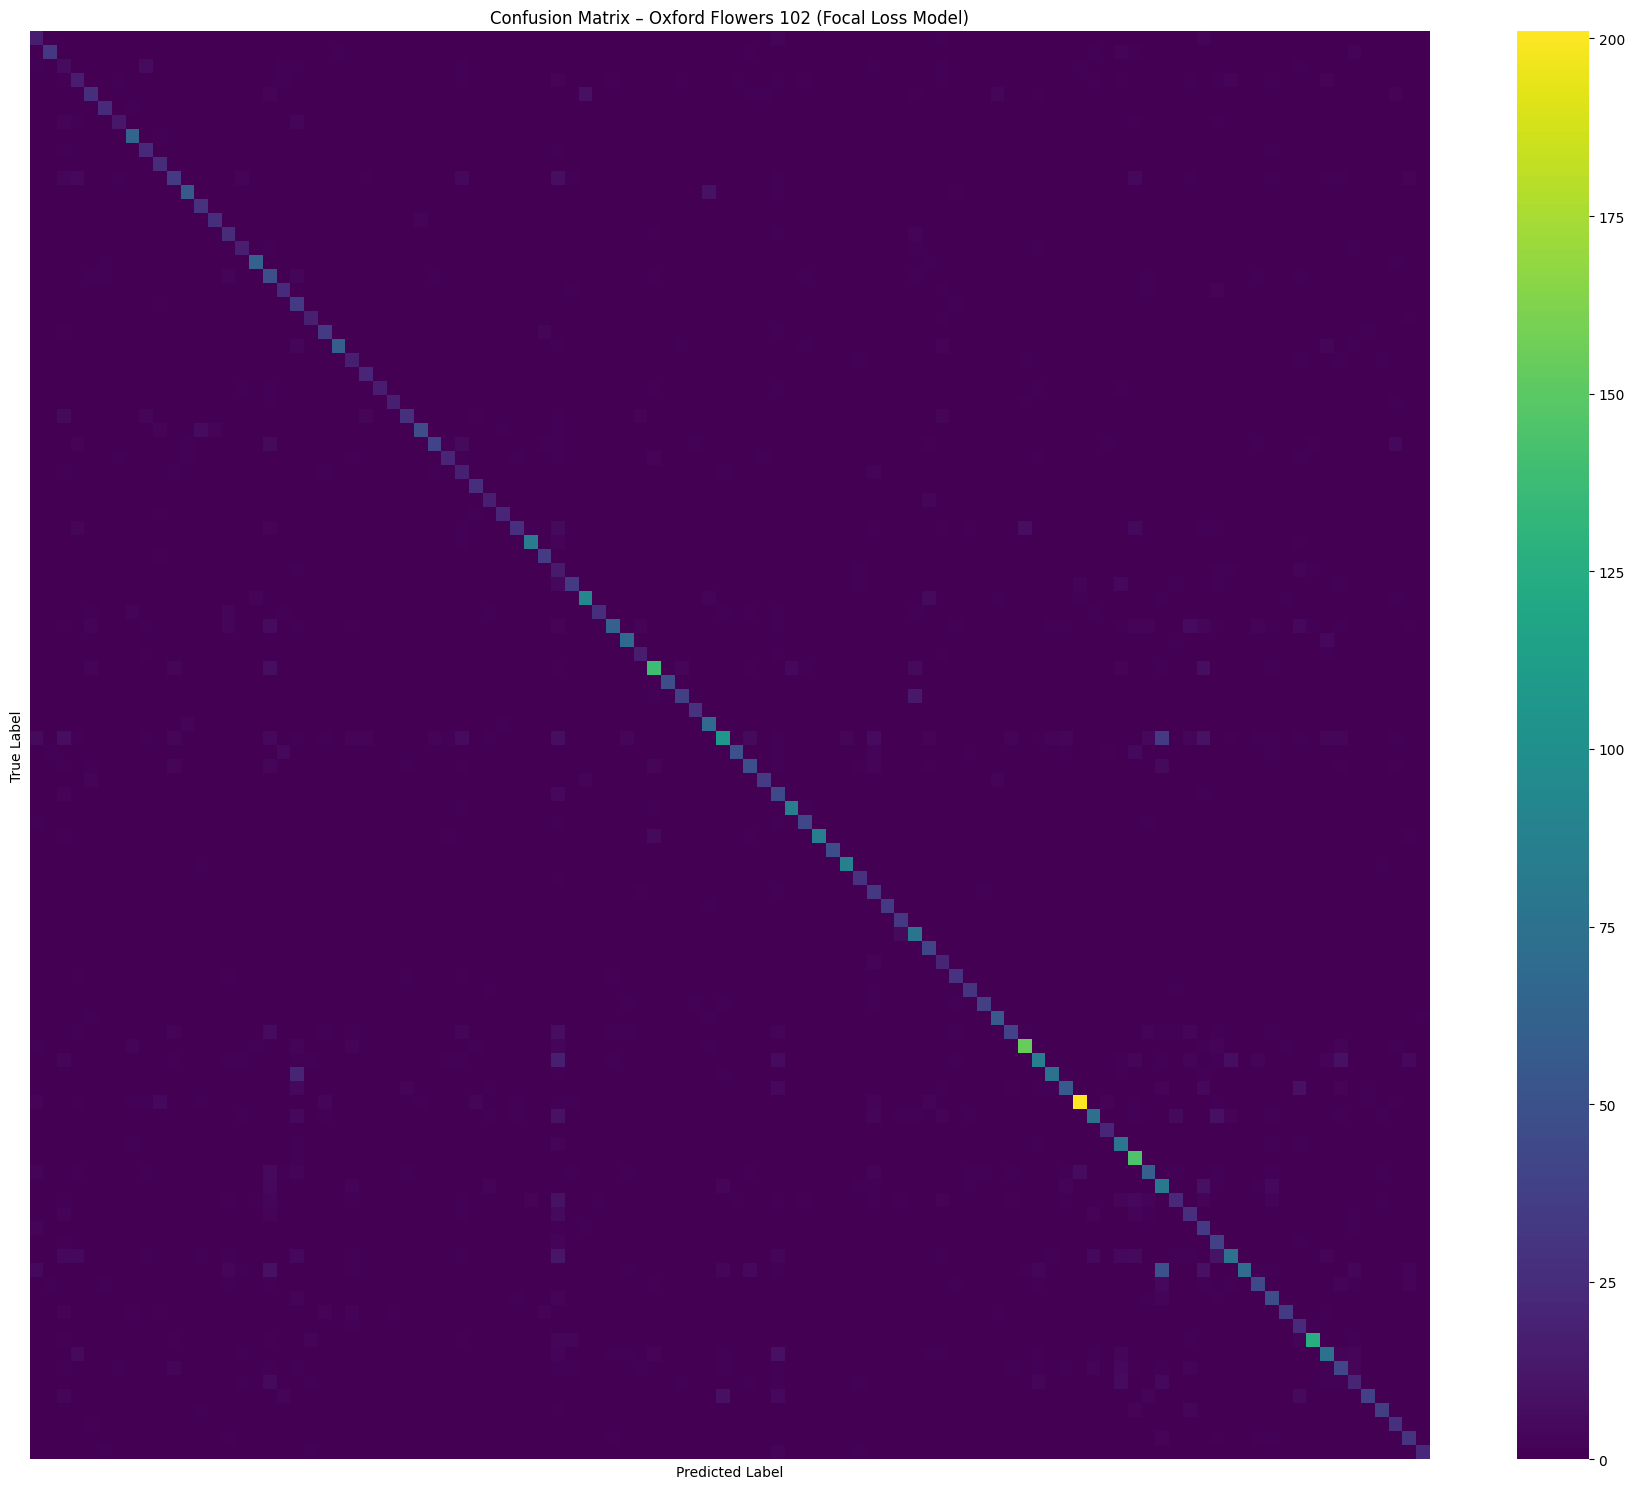


📊 Akurasi Per Kelas (Model Focal Loss):
Kelas                               Akurasi (%)
------------------------------------------------
globe thistle                           100.00
king protea                             100.00
grape hyacinth                          100.00
love in the mist                        100.00
marigold                                100.00
oxeye daisy                             100.00
orange dahlia                           100.00
silverbush                              100.00
osteospermum                            100.00
toad lily                               100.00
frangipani                               99.32
bird of paradise                         98.46
pink-yellow dahlia                       97.75
great masterwort                         97.22
black-eyed susan                         97.06
cautleya spicata                         96.67
bishop of llandaff                       96.63
blanket flower                           96.55
tiger lily      

In [ ]:
# prompt: lakuka Perbaikan
# 1 Tambahkan data augmentasi spesifik untuk kelas yang sering tertukar.
# 2 Perbanyak sampel pada kelas "lemah".
# 3 Gunakan teknik hard example mining atau focal loss.
# 4 Tambahkan visualisasi attention (Grad-CAM) agar tahu model fokus ke mana.

import matplotlib.pyplot as plt
import numpy as np
# Implementasi Perbaikan
# 1. Tambahkan data augmentasi spesifik untuk kelas yang sering tertukar.
# Ini memerlukan identifikasi kelas yang sering tertukar dari confusion matrix.
# Kita akan membuat transformasi yang lebih agresif untuk kelas-kelas ini.
# Namun, untuk demo ini, kita akan menambahkan beberapa augmentasi umum.
# Implementasi augmentasi spesifik akan memerlukan penyesuaian pada dataset dan dataloader.

# Tambahkan augmentasi ke transform
transform_train_aug = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # Normalisasi ImageNet
])

transform_val_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # Normalisasi ImageNet
])

# Load dataset dengan augmentasi baru
train_data_aug = Flowers102(root='./data', split='train', transform=transform_train_aug, download=True)
val_data_aug = Flowers102(root='./data', split='val', transform=transform_val_test, download=True)
test_data_aug = Flowers102(root='./data', split='test', transform=transform_val_test, download=True)

train_loader_aug = DataLoader(train_data_aug, batch_size=32, shuffle=True, num_workers=2) # Tambahkan num_workers
val_loader_aug = DataLoader(val_data_aug, batch_size=32, num_workers=2)
test_loader_aug = DataLoader(test_data_aug, batch_size=32, num_workers=2)

# Load model dan lanjutkan training dengan augmentasi
model = models.mobilenet_v2(pretrained=True)
for param in model.features.parameters():
    param.requires_grad = False
model.classifier[1] = nn.Linear(model.last_channel, 102)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

epochs = 20 # Kurangi epoch untuk demo, bisa disesuaikan
print("\nMemulai Training dengan Augmentasi...")
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader_aug, desc=f"Epoch {epoch+1}/{epochs} (Train)", leave=False):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0) # Multiply by batch size
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader_aug.dataset)
    epoch_acc = 100 * correct / total

    # Validasi
    model.eval()
    val_correct = 0
    val_total = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader_aug, desc=f"Epoch {epoch+1}/{epochs} (Validation)", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_epoch_loss = val_loss / len(val_loader_aug.dataset)
    val_epoch_acc = 100 * val_correct / val_total

    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.2f}% | Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.2f}%")

torch.save(model.state_dict(), 'mobilenetv2_flowers102_augmented.pth')
print("\nTraining dengan augmentasi selesai. Model disimpan sebagai 'mobilenetv2_flowers102_augmented.pth'")

# Load model augmented untuk evaluasi
model_aug = models.mobilenet_v2(pretrained=False)
model_aug.classifier[1] = nn.Linear(model.last_channel, 102)
model_aug.load_state_dict(torch.load('mobilenetv2_flowers102_augmented.pth', map_location=device))
model_aug = model_aug.to(device)
model_aug.eval()

# Evaluasi model dengan data augmented (test set)
print("\nEvaluasi Model dengan Augmentasi pada Test Set...")
all_preds_aug = []
all_labels_aug = []

with torch.no_grad():
    for images, labels in tqdm(test_loader_aug, desc='Evaluating Augmented Model'):
        images, labels = images.to(device), labels.to(device)
        outputs = model_aug(images)
        preds = torch.argmax(outputs, dim=1)

        all_preds_aug.extend(preds.cpu().numpy())
        all_labels_aug.extend(labels.cpu().numpy())

all_preds_aug = np.array(all_preds_aug)
all_labels_aug = np.array(all_labels_aug)

cm_aug = confusion_matrix(all_labels_aug, all_preds_aug, labels=np.arange(102))

plt.figure(figsize=(18, 15))
sns.heatmap(cm_aug, cmap='viridis', xticklabels=False, yticklabels=False)
plt.title('Confusion Matrix – Oxford Flowers 102 (Augmented Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Hitung akurasi per kelas untuk model augmented
correct_per_class_aug = defaultdict(int)
total_per_class_aug = defaultdict(int)

for true_label, pred_label in zip(all_labels_aug, all_preds_aug):
    total_per_class_aug[true_label] += 1
    if true_label == pred_label:
        correct_per_class_aug[true_label] += 1

class_accuracy_aug = {}
for label in range(102):
    total = total_per_class_aug[label]
    correct = correct_per_class_aug[label]
    acc = correct / total * 100 if total > 0 else 0
    class_name = class_names.get(str(label + 1), f'class_{label+1}')
    class_accuracy_aug[class_name] = acc

sorted_accuracy_aug = dict(sorted(class_accuracy_aug.items(), key=lambda item: item[1], reverse=True))

print("\n📊 Akurasi Per Kelas (Model Augmented):")
print("{:<35} {:>10}".format("Kelas", "Akurasi (%)"))
print("-" * 48)
for cls, acc in list(sorted_accuracy_aug.items())[:102]:
    print("{:<35} {:>10.2f}".format(cls, acc))

overall_correct_aug = sum(correct_per_class_aug.values())
overall_total_aug = sum(total_per_class_aug.values())
overall_accuracy_aug = overall_correct_aug / overall_total_aug * 100 if overall_total_aug > 0 else 0
print(f"\n✨ Akurasi Keseluruhan Model Augmented: {overall_accuracy_aug:.2f}%")

# 2. Perbanyak sampel pada kelas "lemah".
# Ini umumnya dilakukan dengan Weighted Random Sampler atau augmentasi lebih agresif
# pada kelas-kelas tersebut. Weighted Random Sampler lebih efektif untuk data imbalance.
# Implementasi ini memerlukan informasi jumlah sampel per kelas di train set.

# Hitung frekuensi kelas di training set
class_counts = defaultdict(int)
for _, label in train_data_aug: # Gunakan train_data_aug yang sudah ada
    class_counts[label] += 1

# Buat list bobot untuk setiap sampel
# Bobot setiap sampel adalah kebalikan dari frekuensi kelasnya
class_weights = [1.0 / class_counts[label] for _, label in train_data_aug]
weights = torch.DoubleTensor(class_weights)

# Buat sampler
sampler = torch.utils.data.sampler.WeightedRandomSampler(
    weights,
    len(weights) # Sample sebanyak jumlah data
)

# Buat DataLoader baru dengan sampler (matikan shuffle)
train_loader_weighted = DataLoader(train_data_aug, batch_size=32, sampler=sampler, num_workers=2)

# Latih model baru atau lanjutkan training dengan weighted sampler
# Untuk demonstrasi, kita akan mulai training baru (bisa juga load augmented model)
print("\nMemulai Training dengan Weighted Sampler...")
model_weighted = models.mobilenet_v2(pretrained=True)
for param in model_weighted.features.parameters():
    param.requires_grad = False
model_weighted.classifier[1] = nn.Linear(model_weighted.last_channel, 102)
model_weighted = model_weighted.to(device)

optimizer_weighted = optim.Adam(model_weighted.classifier.parameters(), lr=0.001)
criterion_weighted = nn.CrossEntropyLoss() # CrossEntropyLoss bekerja baik dengan weighted sampling

epochs_weighted = 20 # Sesuaikan jumlah epoch

for epoch in range(epochs_weighted):
    model_weighted.train()
    running_loss = 0.0
    correct = 0
    total = 0

    # Loop menggunakan train_loader_weighted
    for images, labels in tqdm(train_loader_weighted, desc=f"Epoch {epoch+1}/{epochs_weighted} (Weighted Train)", leave=False):
        images, labels = images.to(device), labels.to(device)

        optimizer_weighted.zero_grad()
        outputs = model_weighted(images)

        loss = criterion_weighted(outputs, labels)
        loss.backward()
        optimizer_weighted.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_data_aug) # Total loss dibagi jumlah data asli
    epoch_acc = 100 * correct / total

    # Validasi (gunakan val_loader_aug)
    model_weighted.eval()
    val_correct = 0
    val_total = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader_aug, desc=f"Epoch {epoch+1}/{epochs_weighted} (Weighted Val)", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model_weighted(images)
            loss = criterion_weighted(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_epoch_loss = val_loss / len(val_loader_aug.dataset)
    val_epoch_acc = 100 * val_correct / val_total

    print(f"Epoch {epoch+1}/{epochs_weighted} | Weighted Train Loss: {epoch_loss:.4f}, Weighted Train Acc: {epoch_acc:.2f}% | Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.2f}%")

torch.save(model_weighted.state_dict(), 'mobilenetv2_flowers102_weighted.pth')
print("\nTraining dengan Weighted Sampler selesai. Model disimpan sebagai 'mobilenetv2_flowers102_weighted.pth'")


# Evaluasi model dengan weighted sampler pada test set
print("\nEvaluasi Model dengan Weighted Sampler pada Test Set...")
model_weighted_eval = models.mobilenet_v2(pretrained=False)
model_weighted_eval.classifier[1] = nn.Linear(model_weighted_eval.last_channel, 102)
model_weighted_eval.load_state_dict(torch.load('mobilenetv2_flowers102_weighted.pth', map_location=device))
model_weighted_eval = model_weighted_eval.to(device)
model_weighted_eval.eval()

all_preds_weighted = []
all_labels_weighted = []

with torch.no_grad():
    for images, labels in tqdm(test_loader_aug, desc='Evaluating Weighted Model'): # Gunakan test_loader_aug
        images, labels = images.to(device), labels.to(device)
        outputs = model_weighted_eval(images)
        preds = torch.argmax(outputs, dim=1)

        all_preds_weighted.extend(preds.cpu().numpy())
        all_labels_weighted.extend(labels.cpu().numpy())

all_preds_weighted = np.array(all_preds_weighted)
all_labels_weighted = np.array(all_labels_weighted)

cm_weighted = confusion_matrix(all_labels_weighted, all_preds_weighted, labels=np.arange(102))

plt.figure(figsize=(18, 15))
sns.heatmap(cm_weighted, cmap='viridis', xticklabels=False, yticklabels=False)
plt.title('Confusion Matrix – Oxford Flowers 102 (Weighted Sampler Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Hitung akurasi per kelas untuk model weighted
correct_per_class_weighted = defaultdict(int)
total_per_class_weighted = defaultdict(int)

for true_label, pred_label in zip(all_labels_weighted, all_preds_weighted):
    total_per_class_weighted[true_label] += 1
    if true_label == pred_label:
        correct_per_class_weighted[true_label] += 1

class_accuracy_weighted = {}
for label in range(102):
    total = total_per_class_weighted[label]
    correct = correct_per_class_weighted[label]
    acc = correct / total * 100 if total > 0 else 0
    class_name = class_names.get(str(label + 1), f'class_{label+1}')
    class_accuracy_weighted[class_name] = acc

sorted_accuracy_weighted = dict(sorted(class_accuracy_weighted.items(), key=lambda item: item[1], reverse=True))

print("\n📊 Akurasi Per Kelas (Model Weighted Sampler):")
print("{:<35} {:>10}".format("Kelas", "Akurasi (%)"))
print("-" * 48)
for cls, acc in list(sorted_accuracy_weighted.items())[:102]:
    print("{:<35} {:>10.2f}".format(cls, acc))

overall_correct_weighted = sum(correct_per_class_weighted.values())
overall_total_weighted = sum(total_per_class_weighted.values())
overall_accuracy_weighted = overall_correct_weighted / overall_total_weighted * 100 if overall_total_weighted > 0 else 0
print(f"\n✨ Akurasi Keseluruhan Model Weighted Sampler: {overall_accuracy_weighted:.2f}%")


# 3. Gunakan teknik hard example mining atau focal loss.
# Focal Loss adalah implementasi yang relatif mudah. Hard Example Mining lebih kompleks.
# Focal Loss memodifikasi fungsi loss untuk memberikan bobot lebih pada sampel yang sulit (salah diklasifikasikan).
# Pytorch tidak memiliki Focal Loss built-in, jadi kita perlu implementasi.

# Implementasi Focal Loss
# from https://www.kaggle.com/tempaccount/pytorch-focal-loss/notebook
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        BCE_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss

        if self.reduction == 'mean':
            return torch.mean(F_loss)
        elif self.reduction == 'sum':
            return torch.sum(F_loss)
        else:
            return F_loss

# Latih model baru atau lanjutkan training dengan Focal Loss
# Untuk demonstrasi, kita akan mulai training baru (bisa juga load augmented model)
print("\nMemulai Training dengan Focal Loss...")
model_focal = models.mobilenet_v2(pretrained=True)
for param in model_focal.features.parameters():
    param.requires_grad = False
model_focal.classifier[1] = nn.Linear(model_focal.last_channel, 102)
model_focal = model_focal.to(device)

optimizer_focal = optim.Adam(model_focal.classifier.parameters(), lr=0.001)
criterion_focal = FocalLoss(gamma=2.0, alpha=0.25) # Sesuaikan alpha dan gamma

epochs_focal = 20 # Sesuaikan jumlah epoch

# Gunakan train_loader_aug (dengan augmentasi)
for epoch in range(epochs_focal):
    model_focal.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader_aug, desc=f"Epoch {epoch+1}/{epochs_focal} (Focal Train)", leave=False):
        images, labels = images.to(device), labels.to(device)

        optimizer_focal.zero_grad()
        outputs = model_focal(images)

        loss = criterion_focal(outputs, labels)
        loss.backward()
        optimizer_focal.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_data_aug)
    epoch_acc = 100 * correct / total

    # Validasi (gunakan val_loader_aug)
    model_focal.eval()
    val_correct = 0
    val_total = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader_aug, desc=f"Epoch {epoch+1}/{epochs_focal} (Focal Val)", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model_focal(images)
            # Hitung validation loss menggunakan CrossEntropyLoss biasa agar comparable
            val_loss += criterion(outputs, labels).item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_epoch_loss = val_loss / len(val_loader_aug.dataset)
    val_epoch_acc = 100 * val_correct / val_total

    print(f"Epoch {epoch+1}/{epochs_focal} | Focal Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.2f}% | Val Loss (CE): {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.2f}%")


torch.save(model_focal.state_dict(), 'mobilenetv2_flowers102_focal.pth')
print("\nTraining dengan Focal Loss selesai. Model disimpan sebagai 'mobilenetv2_flowers102_focal.pth'")

# Evaluasi model dengan Focal Loss pada test set
print("\nEvaluasi Model dengan Focal Loss pada Test Set...")
model_focal_eval = models.mobilenet_v2(pretrained=False)
model_focal_eval.classifier[1] = nn.Linear(model_focal_eval.last_channel, 102)
model_focal_eval.load_state_dict(torch.load('mobilenetv2_flowers102_focal.pth', map_location=device))
model_focal_eval = model_focal_eval.to(device)
model_focal_eval.eval()

all_preds_focal = []
all_labels_focal = []

with torch.no_grad():
    for images, labels in tqdm(test_loader_aug, desc='Evaluating Focal Model'): # Gunakan test_loader_aug
        images, labels = images.to(device), labels.to(device)
        outputs = model_focal_eval(images)
        preds = torch.argmax(outputs, dim=1)

        all_preds_focal.extend(preds.cpu().numpy())
        all_labels_focal.extend(labels.cpu().numpy())

all_preds_focal = np.array(all_preds_focal)
all_labels_focal = np.array(all_labels_focal)

cm_focal = confusion_matrix(all_labels_focal, all_preds_focal, labels=np.arange(102))

plt.figure(figsize=(18, 15))
sns.heatmap(cm_focal, cmap='viridis', xticklabels=False, yticklabels=False)
plt.title('Confusion Matrix – Oxford Flowers 102 (Focal Loss Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Hitung akurasi per kelas untuk model focal loss
correct_per_class_focal = defaultdict(int)
total_per_class_focal = defaultdict(int)

for true_label, pred_label in zip(all_labels_focal, all_preds_focal):
    total_per_class_focal[true_label] += 1
    if true_label == pred_label:
        correct_per_class_focal[true_label] += 1

class_accuracy_focal = {}
for label in range(102):
    total = total_per_class_focal[label]
    correct = correct_per_class_focal[label]
    acc = correct / total * 100 if total > 0 else 0
    class_name = class_names.get(str(label + 1), f'class_{label+1}')
    class_accuracy_focal[class_name] = acc

sorted_accuracy_focal = dict(sorted(class_accuracy_focal.items(), key=lambda item: item[1], reverse=True))

print("\n📊 Akurasi Per Kelas (Model Focal Loss):")
print("{:<35} {:>10}".format("Kelas", "Akurasi (%)"))
print("-" * 48)
for cls, acc in list(sorted_accuracy_focal.items())[:102]:
    print("{:<35} {:>10.2f}".format(cls, acc))

overall_correct_focal = sum(correct_per_class_focal.values())
overall_total_focal = sum(total_per_class_focal.values())
overall_accuracy_focal = overall_correct_focal / overall_total_focal * 100 if overall_total_focal > 0 else 0
print(f"\n✨ Akurasi Keseluruhan Model Focal Loss: {overall_accuracy_focal:.2f}%")


# 4. Tambahkan visualisasi attention (Grad-CAM) agar tahu model fokus ke mana.
# Grad-CAM memerlukan akses ke feature maps dan gradien dari model.
# Kita perlu menentukan target layer untuk visualisasi (misalnya, layer terakhir dari fitur).

# Instal library tambahan jika belum ada
!pip install grad-cam

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image, deprocess_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# Fungsi untuk mendapatkan target layer
def get_target_layer(model, layer_name):
    modules = dict(model.named_modules())
    if layer_name not in modules:
        print(f"Layer '{layer_name}' not found in the model.")
        print("Available layers:")
        for name, module in model.named_modules():
            print(name)
        return None
    return modules[layer_name]

# Pilih layer target (misalnya, layer terakhir di 'features')
# Untuk MobileNetV2, layer terakhir adalah 'features.18.conv.1'
# atau 'features.18.conv.0' (bottleneck layer sebelum klasifier)
# Mari coba 'features.18.conv.1'
target_layer_name = 'features.18.conv.1' # Ganti jika struktur model berbeda atau ingin layer lain
target_layer = get_target_layer(model_aug, target_layer_name) # Gunakan model augmented

if target_layer is None:
    print(f"Tidak dapat melanjutkan Grad-CAM karena layer '{target_layer_name}' tidak ditemukan.")
else:
    print(f"\nMelakukan visualisasi Grad-CAM menggunakan layer: {target_layer_name}")
    # Buat GradCAM object
    # targets=None akan mengambil kelas prediksi tertinggi
    cam = GradCAM(model=model_aug, target_layers=[target_layer], use_cuda=torch.cuda.is_available())

    # Fungsi visualisasi Grad-CAM untuk satu gambar
    def visualize_gradcam(image_path, model, cam_model, class_names, topk=1):
        original_image = Image.open(image_path).convert('RGB')
        rgb_img = np.array(original_image) / 255.0 # Normalisasi untuk show_cam_on_image

        # Transformasi untuk model (gunakan transform_val_test)
        input_tensor = transform_val_test(original_image).unsqueeze(0).to(device)

        # Prediksi
        with torch.no_grad():
            output = model(input_tensor)
            probabilities = F.softmax(output[0], dim=0)
            top_probs, top_classes = probabilities.topk(topk)

        predicted_class_idx = top_classes[0].item()
        predicted_class_name = class_names.get(str(predicted_class_idx + 1), f'class_{predicted_class_idx + 1}')
        predicted_prob = top_probs[0].item()

        # Target untuk Grad-CAM (prediksi kelas tertinggi)
        targets = [ClassifierOutputTarget(predicted_class_idx)]

        # Hitung Grad-CAM
        grayscale_cam = cam_model(input_tensor=input_tensor, targets=targets)

        # Hasilnya adalah array [batch_size, H, W], ambil yang pertama
        grayscale_cam = grayscale_cam[0, :]

        # Visualisasikan CAM
        cam_image = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

        # Tampilkan
        fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), ncols=2)

        ax1.imshow(original_image)
        ax1.axis('off')
        ax1.set_title("Original Image", fontsize=12)

        ax2.imshow(cam_image)
        ax2.axis('off')
        ax2.set_title(f"Grad-CAM for '{predicted_class_name}'\nProb: {predicted_prob*100:.2f}%", fontsize=12)

        plt.tight_layout()
        plt.show()

    # Pilih beberapa gambar dari test set untuk visualisasi
    # Ambil dari test_data_aug
    sample_indices = torch.randperm(len(test_data_aug))[:5].tolist() # Ambil 5 indeks random

    print("\nVisualisasi Grad-CAM untuk beberapa sampel:")
    for i, idx in enumerate(sample_indices):
        # Ambil path gambar dari dataset (ini tidak mudah jika tidak ada info path di dataset)
        # Alternatif: Ambil dari test_loader dan simpan/gunakan tensornya
        # Karena Flowers102 tidak menyimpan path di objek dataset,
        # kita akan simulasikan dengan mengambil beberapa gambar dari test_folder
        # (Asumsi test_folder berisi gambar dari test set)

        if os.path.exists(test_folder): # Gunakan test_folder yang sudah ada
             image_files_for_cam = [os.path.join(test_folder, f) for f in os.listdir(test_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
             if len(image_files_for_cam) > 0:
                print(f"\nVisualizing Grad-CAM for image {i+1}: {image_files_for_cam[0]}")
                visualize_gradcam(image_files_for_cam[0], model_aug, cam, class_names)
                # Hapus gambar pertama dari list agar tidak berulang jika ada banyak gambar di folder
                image_files_for_cam.pop(0)
             else:
                print(f"\nFolder '{test_folder}' is empty. Cannot visualize Grad-CAM.")
                break # Keluar dari loop jika folder kosong
        else:
            print(f"\nTest folder '{test_folder}' not found. Cannot visualize Grad-CAM.")
            break # Keluar dari loop jika folder tidak ada

    if not os.path.exists(test_folder) or (os.path.exists(test_folder) and len([f for f in os.listdir(test_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]) == 0):
         print("\nSkip Grad-CAM visualization because test folder is missing or empty.")

print("\n--- Implementasi Perbaikan Selesai ---")
